# Lab 07 - Data Preprocessing II

Name: Jimmy Pronchick  
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2023
Instructor: Brian King  

REMEMBER – you are encouraged to work on these labs using pair programming!

# Objectives
* munge, Munge, MUNGE! (Or, wrangle it. Whatever works for you.)
* Data Integration
* Work on different techniques to assess similar variables

# Introduction
You already started the first part of this lab in Lab 6, in which you downloaded multiple years of hourly weather observations. If not, **be sure to complete the first part of the lab before you begin this lab.**

Work through this lab, and enter the answers to questions throughout this lab.

> Just a friendly reminder, please pay attention to the **[P]** vs. **[M]** vs. **[PM]** indicator. All [P] questions should be answered by writing the Python code that outputs the answer. Your code quality should be striving for smart, efficient, well-designed, well-documented code. For code that is asking for specific answers, you should be writing Python code that outputs the answer that is wanted, and nothing more.

In your last lab, you created a data directory, and downloaded a dataset from [The Pennsylvania State Climatologist](http://climate.met.psu.edu) representing hourly observations from 2000 – 2022 at Williamsport, PA (KIPT). The last lab focused quite a bit on preliminary steps to clean the data. You also had your first real exposure to dealing with times and dates with data, and understood first-hand why it's so important to be sure you set the proper type of every variable in your data. You should have printed out summary statistics for every variable, which should have included the occurrence of missing (e.g. NaN, null) values.

There are a few important observations to make here:

1. You had missing variables in data you downloaded
2. You had missing observations (i.e. the equipment did NOT record every hour!)
3. The data that you do have may be questionable, as it is quite noisy at times.

How will we create a complete dataset?

---
# Your task
The scenario for this lab is as follows. You have missing data, and you've been instructed to estimate the missing data from complete data retrieved from nearby stations under the premise that nearby stations are likely to have highly similar observations. This is a data integration challenge. KIPT is a pretty reliable station, but there are missing values, and a few other peculiarities.


In [515]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise

---
**1)**	[P] Create a Python function called `process_FAA_hourly_data` that takes a filename (with path) as a string, and returns a completely processed pandas data frame of the data, ready for analysis. This is not as hard as it sounds, since you did all the work in the previous lab. Your function should:
a.	convert all numeric variables to their simplest numeric types
b.	convert the date/time stamp (first variable) to a pandas `DatetimeIndex`, which becomes the actual index for the data frame.
c.	drop the date time variable after moving it to become the index.
d.	If you did not do this in the last lab, make sure that the `DatetimeIndex` is localized to a specific timezone! This is very important! What time zone? Did you notice the header? The time stamp is in **GMT**, so be sure to localize the index accordingly by doing the following:

`df.index = df.index.tz_localize(tz='GMT')`

**NOTE: The last exercise in the previous lab had you eliminate a year from the data for the very last problem. Do NOT do that here! We'll explore that again later.**


In [516]:
# ANSWER

def process_FAA_hourly_csv(fname: str):
    """ This function takes a raw hourly weather data CSV file downloaded from 
        http://climate.psu.edu/data/ida and processes it.

        Parameters
            fname(str) - a string representing the path to a raw CSV file

        Returns
            A Pandas DataFrame object
    """
    df_temps = pd.read_csv(fname,skiprows=16)
    
    fcols = df_temps.select_dtypes('float').columns
    icols = df_temps.select_dtypes('integer').columns

    df_temps[fcols] = df_temps[fcols].apply(pd.to_numeric, downcast='float')
    df_temps[icols] = df_temps[icols].apply(pd.to_numeric, downcast='integer')
    
    df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])
    df_temps.set_index("Date/Time (GMT)",inplace=True)
    df_temps.index = df_temps.index.tz_localize(tz='GMT')
    
    df_temps.drop(["Unnamed: 13"],axis=1,inplace=True)

    return df_temps

---
**2)**	[P] Use your new function to read in the KIPT data file you downloaded in the last lab. Store your data frame as `df_kipt`. Output the results of `info()` and `describe()` to confirm you read it in correctly.

In [517]:
# ANSWER

df_kipt = process_FAA_hourly_csv("../data/faa_hourly-KIPT_20000101-20221231_raw.csv")

df_kipt.info()
df_kipt.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199201 entries, 2000-01-01 00:00:00+00:00 to 2022-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   199201 non-null  int8   
 1   Average Temp (F)               198189 non-null  float32
 2   Max Temp (F)                   198189 non-null  float32
 3   Min Temp (F)                   198189 non-null  float32
 4   Average Dewpoint Temp (F)      198067 non-null  float32
 5   1 Hour Precip (in)             32345 non-null   float32
 6   Max Wind Gust (mph)            26839 non-null   float32
 7   Average Relative Humidity (%)  193828 non-null  float32
 8   Average Wind Speed (mph)       198638 non-null  float32
 9   Average Station Pressure (mb)  198852 non-null  float32
 10  Average Wind Direction (deg)   165309 non-null  float32
 11  Max Wind Speed (mph)           198638 non-nul

C:\Users\jpron\AppData\Local\Temp\ipykernel_14700\2229489023.py:21: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])


,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,199201.000000,198189.000000,198189.000000,198189.000000,198067.000000,32345.000000,26839.000000,193828.000000,198638.000000,198852.000000,165309.000000,198638.000000
mean,1.335465,51.465050,51.573257,51.363098,40.293449,0.031091,22.509455,68.532433,5.905178,1016.772888,173.240143,6.171429
std,0.850589,18.869694,18.888813,18.862051,18.986214,0.078938,7.370926,19.670893,5.183443,7.593204,119.891029,5.294579
min,0.000000,-11.900000,-11.900000,-11.900000,-20.900000,0.000000,0.000000,0.000000,0.000000,508.600006,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,26.049999,0.000000,19.600000,54.000000,0.000000,1012.200012,66.669998,0.000000
50%,1.000000,52.000000,52.000000,52.000000,41.000000,0.000000,21.900000,71.000000,5.320000,1016.900024,200.000000,5.800000
75%,1.000000,66.900002,66.900002,66.900002,57.000000,0.030000,26.500000,86.000000,9.200000,1021.700012,280.000000,9.200000
max,10.000000,102.000000,102.000000,102.000000,79.000000,2.350000,88.599998,100.000000,76.000000,1044.400024,360.000000,76.000000


---
**3)**	[P] In the last lab, you assessed the number of missing dates in your data, under the assumption that every hour should have an observation. For now, we'll ignore the fact that there are completely missing hourly observations from the weather station. Report the number of missing values in each variable of `df_kipt` from the data you have.

In [518]:
# ANSWER
df_kipt.isna().sum()

Number of Observations (n/a)          0
Average Temp (F)                   1012
Max Temp (F)                       1012
Min Temp (F)                       1012
Average Dewpoint Temp (F)          1134
1 Hour Precip (in)               166856
Max Wind Gust (mph)              172362
Average Relative Humidity (%)      5373
Average Wind Speed (mph)            563
Average Station Pressure (mb)       349
Average Wind Direction (deg)      33892
Max Wind Speed (mph)                563
dtype: int64

**4)**	[PM] Let's pay attention to `Average Temp (F)`. **Are there hours of the day are most likely to have missing values?** Report the frequency over each hour that has missing `Average Temp (F)` values. Be sure to report the LOCAL times according to the time zone `US/Eastern`. Output the hours in order of the most frequently missing to least. Then, as a comment, just interpret what you see. Do you see a pattern? Do missing temps tend to happen at a certain time of day?

(HINT: This might be challenging. First, as always, select the subset of your data matching your criteria. Then, for these data, look at the `index`. Date / time data types have LOTS of attributes themselves… such as `hour`. What do you get if you count these values?)

**ANSWER:**
From the distribution below


In [519]:
# ANSWER
df_kipt.loc[:,'Average Temp (F)'].index.tz_convert('US/Eastern').hour.where(
    df_kipt.loc[:,'Average Temp (F)'].isna()).value_counts()



11.0    78
12.0    68
10.0    65
13.0    57
14.0    46
9.0     43
7.0     43
6.0     42
8.0     41
15.0    40
5.0     38
4.0     37
3.0     37
2.0     36
1.0     36
17.0    36
16.0    35
18.0    35
19.0    34
22.0    34
0.0     34
23.0    33
21.0    32
20.0    32
Name: Date/Time (GMT), dtype: int64

---
**5)**	[PM] Repeat the previous exercise, but this time, assess the same variable for the day of the week. (NOTE: Be sure to note what a 0 is. In pandas, a 0 for day of the week is a Monday! See [this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html) for more info).

In [520]:
# ANSWER
df_kipt.loc[:,'Average Temp (F)'].index.tz_convert('US/Eastern').dayofweek.where(
    df_kipt.loc[:,'Average Temp (F)'].isna()).value_counts()



1.0    212
2.0    195
0.0    171
3.0    163
6.0    116
4.0    116
5.0     39
Name: Date/Time (GMT), dtype: int64

**ANSWER:**
Tuesday and Wednesday, and the beginnning of the week generally have the most missing values. Saturday has by far the least missing values.




---
**6)**	[P] Read in the file `FAA_PA_stations.csv` provided on Moodle. It's not actually a comma separated file, but a *tab* separated file.  Store the data frame as stations. Show `stations.info()` after you read in the data.

In [521]:
# ANSWER
stations = pd.read_csv("../data/FAA_PA_stations.csv",sep='\t')

stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                46 non-null     object 
 1   Name              46 non-null     object 
 2   County            45 non-null     object 
 3   State             46 non-null     object 
 4   Lat               46 non-null     float64
 5   Lon               46 non-null     float64
 6   Elevation (feet)  46 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


---
**7)**	[P] As usual, you must always assess the quality and completeness of your data. Are there any observations (rows) in `stations` that have missing data? Output them, then eliminate them from your data. Be sure to `reset_index(drop=True)` to reset the index in case any observations are dropped. Output `stations.info()` again.

In [522]:
# ANSWER:
print(stations[stations.isna().any(axis=1)])
stations.drop([24],inplace=True)

stations.info()



      ID            Name County State     Lat     Lon  Elevation (feet)
24  KUKT  QUAKERTOWN ARP    NaN    PA  40.435 -75.381             524.9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 45
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                45 non-null     object 
 1   Name              45 non-null     object 
 2   County            45 non-null     object 
 3   State             45 non-null     object 
 4   Lat               45 non-null     float64
 5   Lon               45 non-null     float64
 6   Elevation (feet)  45 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


---
**8)**	[P] Examine the data frame of `stations` by showing the first few observations using `stations.head(10)`. In particular, pay close attention to the variables `Lat` and `Lon`. These represent the precise latitude and longitude geolocation for the weather station.

In [523]:
# ANSWER
stations.head(10)

,ID,Name,County,State,Lat,Lon,Elevation (feet)
0,KABE,ALLENTOWN,LEHIGH,PA,40.65,-75.44,376.0
1,KAOO,ALTOONA,BLAIR,PA,40.29,-78.32,1504.0
2,KBVI,BEAVER FALLS,BEAVER,PA,40.77,-80.39,1230.0
3,KBFD,BRADFORD,MCKEAN,PA,41.80,-78.64,2142.0
4,KBTP,BUTLER,BUTLER,PA,40.77,-79.95,1250.0
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.04,-78.41,1516.0
7,KDYL,DOYLESTOWN,BUCKS,PA,40.33,-75.12,394.0
8,KDUJ,DUBOIS,JEFFERSON,PA,41.18,-78.90,1814.0
9,KERI,ERIE,ERIE,PA,42.08,-80.17,730.0


---
**9)**	Create a new variable in `stations` called `distKIPT` that stores the distance of every station in PA to Williamsport (KIPT). Use a standard Euclidean distance calculation (over latitude and longitude) to compute the distance between the stations.

In [524]:
# ANSWER

williamsport = np.asarray([stations.loc[stations.ID=='KIPT'].Lat,stations.loc[stations.ID=='KIPT'].Lon])
dist = (np.asarray([stations.Lat,stations.Lon])-williamsport)
dist = (np.square(dist))
dist = dist[0]+dist[1]
dist = np.sqrt(dist)
stations['distKIPT'] = (dist)

stations
# dist

,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
0,KABE,ALLENTOWN,LEHIGH,PA,40.650,-75.440,376.0,1.593267
1,KAOO,ALTOONA,BLAIR,PA,40.290,-78.320,1504.0,1.691892
2,KBVI,BEAVER FALLS,BEAVER,PA,40.770,-80.390,1230.0,3.501685
3,KBFD,BRADFORD,MCKEAN,PA,41.800,-78.640,2142.0,1.808867
4,KBTP,BUTLER,BUTLER,PA,40.770,-79.950,1250.0,3.066235
5,KCXY,CAPITAL CITY,YORK,PA,40.220,-76.850,340.0,1.022399
6,KFIG,CLEARFIELD,CLEARFIELD,PA,41.040,-78.410,1516.0,1.503363
7,KDYL,DOYLESTOWN,BUCKS,PA,40.330,-75.120,394.0,2.016953
8,KDUJ,DUBOIS,JEFFERSON,PA,41.180,-78.900,1814.0,1.980909
9,KERI,ERIE,ERIE,PA,42.080,-80.170,730.0,3.356799


---
**10)**	[P] Output the top 10 stations that are closest to KIPT. (The closest one should be to itself!) The stations should be listed in order of increasing distance from KIPT.

In [525]:
# ANSWER:
stations.sort_values(by="distKIPT")[:10]


,ID,Name,County,State,Lat,Lon,Elevation (feet),distKIPT
30,KIPT,WILLIAMSPORT,LYCOMING,PA,41.24,-76.92,520.0,0.000000
27,KSEG,SELINSGROVE,SNYDER,PA,40.82,-76.86,444.0,0.424264
18,KMUI,MUIR ARMY AIR FIELD,LEBANON,PA,40.43,-76.57,489.0,0.882383
28,KUNV,UNIVERSITY PARK,CENTRE,PA,40.85,-77.85,1240.0,1.008464
5,KCXY,CAPITAL CITY,YORK,PA,40.22,-76.85,340.0,1.022399
16,KMDT,MIDDLETOWN,DAUPHIN,PA,40.19,-76.76,312.0,1.062121
26,KAVP,SCRANTON,LUZERNE,PA,41.33,-75.72,956.0,1.203370
13,KLNS,LANCASTER,LANCASTER,PA,40.12,-76.29,403.0,1.285029
25,KRDG,READING,BERKS,PA,40.37,-75.96,360.0,1.295569
32,KTHV,YORK,YORK,PA,39.92,-76.87,486.0,1.320947


---
**11)**	[P] Using your results, go back to the [PSU climate website](http://climate.met.psu.edu/data/ida/) and download the *faa_hourly* data for the THREE closest stations that have hourly data available in the same date range as the data you downloaded from KIPT (i.e. 2000-01-01 -> 2022-12-31). (HINT: You may need to skip a station because it does not have data available in this range.) Copy the data into your `data` folder. Then, read in each data file into its own data frame using your function. You should have four data frames: `df_kipt`, and three other data frames representing the three closest stations. Show the result of info() on your three new data frames.

In [526]:
# ANSWER:
df_kcxy = process_FAA_hourly_csv("../data/faa_hourly-KCXY_20000101-20221231.csv")
df_kunv = process_FAA_hourly_csv("../data/faa_hourly-KUNV_20000101-20221231.csv")
df_kseg = process_FAA_hourly_csv("../data/faa_hourly-KSEG_20000101-20221231.csv")


df_kcxy.info()
df_kunv.info()
df_kseg.info()




C:\Users\jpron\AppData\Local\Temp\ipykernel_14700\2229489023.py:21: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])
C:\Users\jpron\AppData\Local\Temp\ipykernel_14700\2229489023.py:21: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153167 entries, 2000-01-01 00:00:00+00:00 to 2022-12-31 23:00:00+00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Number of Observations (n/a)   153167 non-null  int8   
 1   Average Temp (F)               152667 non-null  float32
 2   Max Temp (F)                   152667 non-null  float32
 3   Min Temp (F)                   152667 non-null  float32
 4   Average Dewpoint Temp (F)      152499 non-null  float32
 5   1 Hour Precip (in)             20814 non-null   float32
 6   Max Wind Gust (mph)            17978 non-null   float32
 7   Average Relative Humidity (%)  148430 non-null  float32
 8   Average Wind Speed (mph)       152948 non-null  float32
 9   Average Station Pressure (mb)  152281 non-null  float32
 10  Average Wind Direction (deg)   140310 non-null  float32
 11  Max Wind Speed (mph)           152948 non-nul

C:\Users\jpron\AppData\Local\Temp\ipykernel_14700\2229489023.py:21: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_temps.iloc[:,0] = pd.to_datetime(df_temps.iloc[:,0])


---
You're going to repair the KIPT data, but how? Since we have data from nearby stations with independent readings, let's see how many of our missing data can be filled in from a nearby station. Again, for simplicity, we're only going to focus on average temperature (column 1).

As an advanced CS elective, you should be going for efficient, clean code. It need not be perfect, but it should be well-thought out and documented so you can readily show it to prospective employers, and also use it later! Remember - you are going to start doing more advanced analyses very soon! So, when your code or your output is not obvious or intuitive, write markdown after your output is generated that explains your code, and interprets your results!


---
**12)**	[P] Create a new data frame called `df_ave_temps` that contains the average temperature from all four stations. Name the variables with the four-letter station identifier (e.g. "KIPT"). The index should have a COMPLETE hourly date range from the start date `20000101 00:00:00 GMT` to finish date `20221231 23:00:00 GMT`. The results should be a complete dataset with an observation for every hour. If hourly observations are missing from the station you are copying from, then a NaN value should be stored for that entry. You will use these data for the remainder of this exercise.

Show `df_ave_temps.info()`

(NOTE – Depending on how you do this, it might take a bit of processing time. Be patient.)



In [527]:
# ANSWER
# stationsConcat = pd.concat((df_kipt.iloc[:,1:2],df_kcxy.iloc[:,1:2],df_kunv.iloc[:,1:2],df_kseg.iloc[:,1:2]))
# ave_repaired = stationsConcat.groupby(stationsConcat.index).mean()

start = pd.Timestamp("January 1 2000 at 12:00am")
end = pd.Timestamp("December 31 2022 at 11:00pm")
dr = pd.date_range(start,end, freq='h',tz='GMT') #specifying the timezone is ESSENTIAL, otherwise the datetimeindex
                                                    #wont match the other dataframes and will mess up dfavetemps

df_ave_temps = pd.DataFrame({"KIPT":df_kipt.iloc[:,1],"KSEG":df_kseg.iloc[:,1],
                            "KUNV":df_kunv.iloc[:,1],"KCXY":df_kcxy.iloc[:,1]},index=dr)

df_ave_temps

,KIPT,KSEG,KUNV,KCXY
2000-01-01 00:00:00+00:00,26.100000,27.000000,21.200001,28.000000
2000-01-01 01:00:00+00:00,26.100000,27.000000,21.200001,27.000000
2000-01-01 02:00:00+00:00,26.100000,27.000000,21.200001,26.100000
2000-01-01 03:00:00+00:00,26.100000,26.100000,21.200001,26.100000
2000-01-01 04:00:00+00:00,26.100000,26.100000,21.200001,25.000000
...,...,...,...,...
2022-12-31 19:00:00+00:00,46.950001,46.000000,42.799999,51.099998
2022-12-31 20:00:00+00:00,45.470001,47.150002,42.799999,50.000000
2022-12-31 21:00:00+00:00,46.450001,46.669998,NaN,NaN
2022-12-31 22:00:00+00:00,46.000000,48.900002,NaN,48.000000


---
**13)**	[P] Each station has missing observations for average temperature. Report the number of missing average temperature readings in `df_ave_temps` for each location.

HINT: Your answer should be something like:
```
KIPT     3435
KSEG     4751
KUNV     8966
KCXY    48957
```

In [528]:
# ANSWER:

df_ave_temps.isna().sum() 


KIPT     3435
KSEG     4751
KUNV     8966
KCXY    48957
dtype: int64

---
**14)**	[P] Now, let's get to why we are considering these alternative stations. Report the number of missing values in the average temp for KIPT that have at least one alternative station that is NOT missing for the same hour. You should output a statement like, `There are XXXX out of XXXX missing KIPT temps that can be restored from other locations.`

Also, show the first 10 observations of these data that meet this criteria using head(10). (The first few observations should look something like...

```
                           KIPT       KSEG       KUNV       KCXY
2000-01-03 18:00:00+00:00   NaN  53.099998  57.200001        NaN
2000-01-05 17:00:00+00:00   NaN  35.099998  32.000000        NaN
2000-01-06 20:00:00+00:00   NaN  41.000000  39.200001        NaN
2000-01-07 14:00:00+00:00   NaN  36.000000  35.599998  35.599998
```


In [529]:
# ANSWER

repairable = df_ave_temps.where(df_ave_temps.KIPT.isna()==True).dropna(how='all')


print("There are {} out of {} missing KIPT temps that can be restored from other locations.\n\n".format(
        repairable.shape[0],df_ave_temps.KIPT.isna().sum()))
repairable.head(10)


There are 2022 out of 3435 missing KIPT temps that can be restored from other locations.




,KIPT,KSEG,KUNV,KCXY
2000-01-03 18:00:00+00:00,NaN,53.099998,57.200001,NaN
2000-01-05 17:00:00+00:00,NaN,35.099998,32.000000,NaN
2000-01-06 20:00:00+00:00,NaN,41.000000,39.200001,NaN
2000-01-07 14:00:00+00:00,NaN,36.000000,35.599998,35.599998
2000-01-10 02:00:00+00:00,NaN,39.000000,37.400002,NaN
2000-01-10 03:00:00+00:00,NaN,39.000000,35.599998,NaN
2000-01-10 04:00:00+00:00,NaN,36.000000,NaN,NaN
2000-01-10 05:00:00+00:00,NaN,32.000000,NaN,NaN
2000-01-10 06:00:00+00:00,NaN,34.000000,NaN,NaN
2000-01-10 07:00:00+00:00,NaN,35.349998,NaN,NaN


---
**15a)**	[P] Remember that exercise in the previous lab that gathered the number of missing data by year? Report the number of missing data in KIPT by year that CANNOT be restored from any of the other stations.



In [530]:
# ANSWER

unrepairable = df_ave_temps.isna().all(axis=1).resample('Y').sum()
unrepairable

2000-12-31 00:00:00+00:00    739
2001-12-31 00:00:00+00:00     13
2002-12-31 00:00:00+00:00      4
2003-12-31 00:00:00+00:00     15
2004-12-31 00:00:00+00:00      7
2005-12-31 00:00:00+00:00      7
2006-12-31 00:00:00+00:00      6
2007-12-31 00:00:00+00:00     34
2008-12-31 00:00:00+00:00    109
2009-12-31 00:00:00+00:00     24
2010-12-31 00:00:00+00:00     10
2011-12-31 00:00:00+00:00     13
2012-12-31 00:00:00+00:00     41
2013-12-31 00:00:00+00:00     28
2014-12-31 00:00:00+00:00     11
2015-12-31 00:00:00+00:00     27
2016-12-31 00:00:00+00:00      8
2017-12-31 00:00:00+00:00     61
2018-12-31 00:00:00+00:00     44
2019-12-31 00:00:00+00:00     19
2020-12-31 00:00:00+00:00     22
2021-12-31 00:00:00+00:00     89
2022-12-31 00:00:00+00:00     82
Freq: A-DEC, dtype: int64

---
**15b)** Display a barchart showing your results. Annotate the chart with the year that is standing out as the least likely to be successfully restored.

Text(300, 6, 'Least likely to be restored successfully')

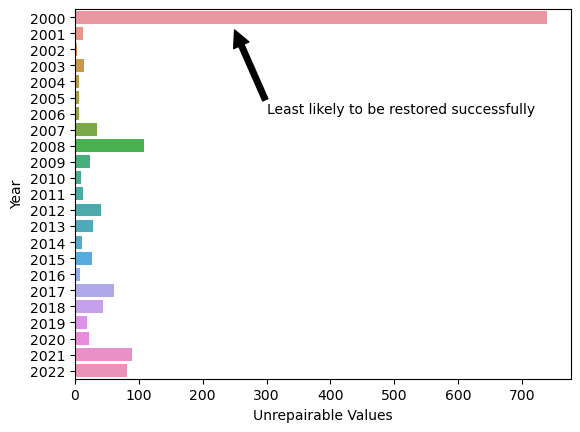

In [531]:
# ANSWER
fig, ax = plt.subplots()
sns.barplot(data=unrepairable,y=unrepairable.index.year,x=unrepairable,orient='h',ax=ax)
plt.ylabel("Year")
plt.xlabel("Unrepairable Values")
plt.annotate("Least likely to be restored successfully", xy=(250,.8),xytext=(300,6),
             arrowprops=dict(facecolor='black'))

---
**16)**	[PM] It still looks like one year in particular is pretty bad. Confirm this **visually** by creating a line plot that plots all four stations for that one year, with each station a different color. Make sure KIPT stands out in some way. Only show the data for that one year you answered in the previous exercise. Interpret your results. In particular, do you see any other problems from any stations? (This might be a good time to use an interactive data visualization tool such as Plotly!)  Label your plot (e.g. title, axis, legend)

---
### A note about wide vs. long format data frames

When plotting multiple variables, such as you want to do here (i.e., KIPT, KSEG, KUNV and KCXY are all variables), Seaborn is not quite as friendly. However, Seaborn works very well when your data with many variables (referred to as a "wide" format") is converted to a "long" format. A long format interpretation of an existing dataframe introduces identifier variables that contain the name of the column selected, and value variables that contain the values of other columns of interest. Fortunately, pandas makes this easy using the `melt()` function.

Let's suppose that dataframe `df` represents the subset of data I want to plot. For example, let's work with `df_ave_temps` that you created above. Then, I can do the following:

```
df=df_ave_temps.melt(value_vars=["KIPT","KSEG","KUNV","KCXY"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)
```
What do I get in return?

```
                          location  Ave Temp (F)
2000-01-01 00:00:00+00:00     KIPT          26.1
2000-01-01 01:00:00+00:00     KIPT          26.1
2000-01-01 02:00:00+00:00     KIPT          26.1
2000-01-01 03:00:00+00:00     KIPT          26.1
2000-01-01 04:00:00+00:00     KIPT          26.1
...                            ...           ...
```

Notice instead of different columns for each station, I now have a new variable, `location`, that contains the location specified from the `value_vars` parameter. This is a long format dataset.

Now, you can easily plot these data using Seaborn! For example, you could try this one out on `df`:

```
g = sns.FacetGrid(data=df,row="location",hue="location")
g.map(sns.scatterplot,"date","Ave Temp (F)",s=3)
plt.show()
```


In [532]:
# ANSWER

df=df_ave_temps[:"Dec 31 2000 11pm"].melt(value_vars=["KIPT","KSEG","KUNV","KCXY"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)

df = df.reset_index()
df = df.rename(columns={"index":"date"})

df
# df.loc[]

,date,location,Ave Temp (F)
0,2000-01-01 00:00:00+00:00,KIPT,26.1
1,2000-01-01 01:00:00+00:00,KIPT,26.1
2,2000-01-01 02:00:00+00:00,KIPT,26.1
3,2000-01-01 03:00:00+00:00,KIPT,26.1
4,2000-01-01 04:00:00+00:00,KIPT,26.1
...,...,...,...
35131,2000-12-31 19:00:00+00:00,KCXY,32.0
35132,2000-12-31 20:00:00+00:00,KCXY,30.9
35133,2000-12-31 21:00:00+00:00,KCXY,30.0
35134,2000-12-31 22:00:00+00:00,KCXY,28.0


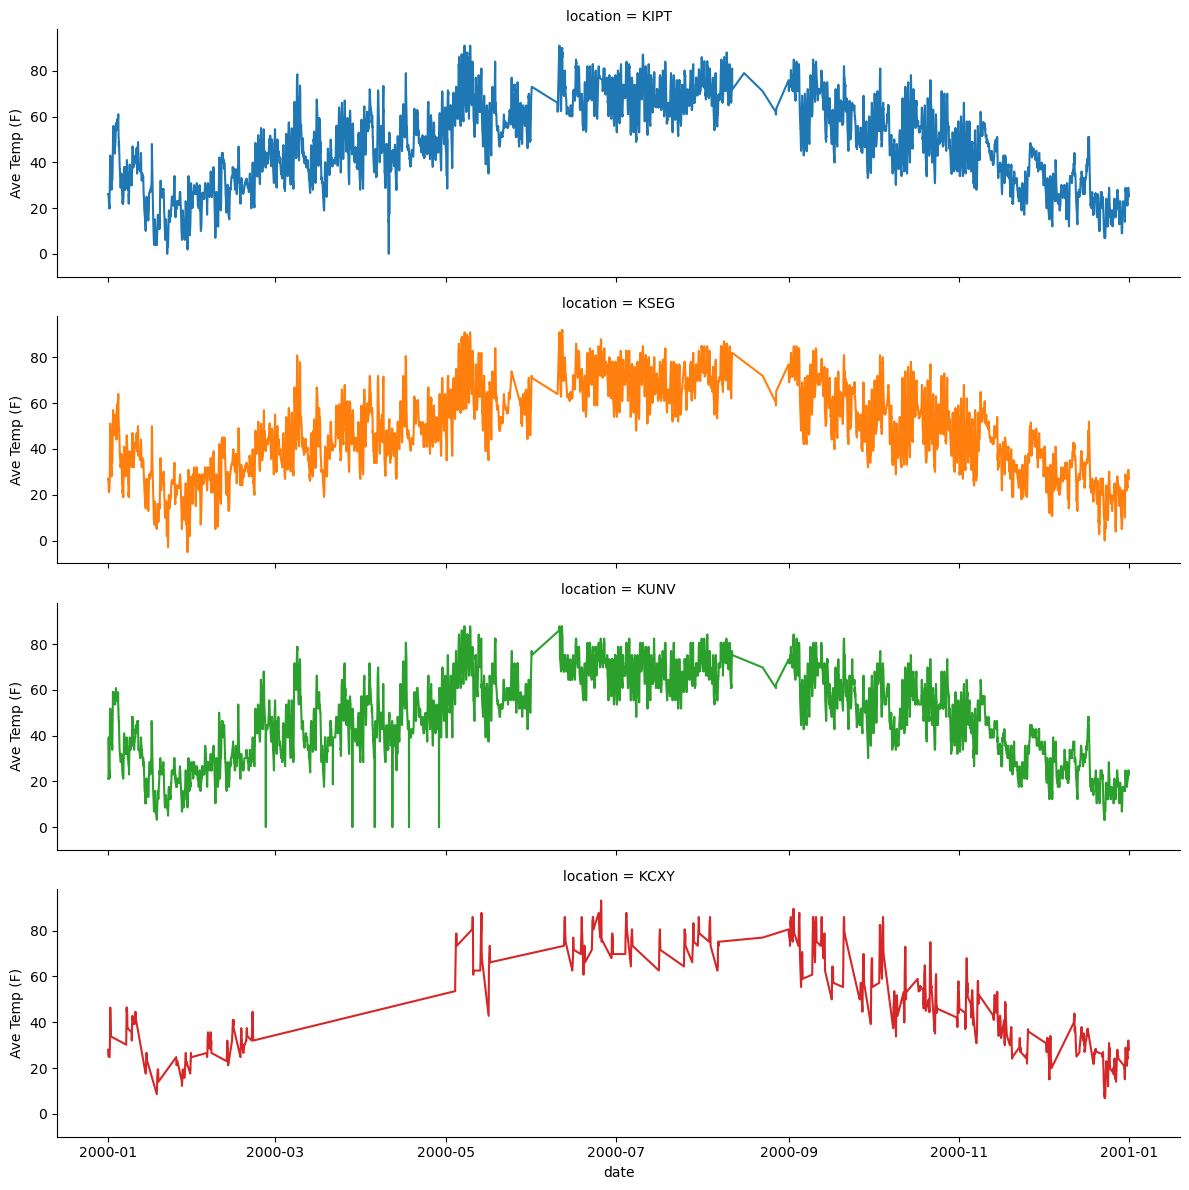

In [533]:
g = sns.FacetGrid(data=df,row="location",hue="location",aspect=4)
g.map(sns.lineplot,"date","Ave Temp (F)")
plt.show()

**ANSWER:**






---
**17)**	[P] Looking at your plot of 2000 over all stations should reveal that KUNV is problematic at 6 different times. Report these observations, but report them from your full KUNV dataframe. Show only those observations.

In [534]:
# ANSWER

kunv_temps = df_kunv[:"Dec 31 2000 11pm"].iloc[:,1]
kunv_temps.where(kunv_temps==0).dropna()

Date/Time (GMT)
2000-02-26 13:00:00+00:00    0.0
2000-03-28 14:00:00+00:00    0.0
2000-04-05 14:00:00+00:00    0.0
2000-04-11 22:00:00+00:00    0.0
2000-04-17 21:00:00+00:00    0.0
2000-04-28 15:00:00+00:00    0.0
Name: Average Temp (F), dtype: float32

---
**18)**	[M] How could you algorithmically detect those problems? Keep in mind that simply saying to turn 0.0 into NaN is not an acceptable solution. 0.0 may very well be a real value! Is there a better approach? (Yes, yes there is.)

**ANSWER:**
These issues could be detected by checking if the average temperature for an hour differs greatly from the hours before and after. You could write code to change any hour to Nan that is outside the outlier limits (using the 1.5*Q1 Q3 rule) for the datetime.day it is in.





---
**19)**	[P] Now, write the code to generate line plot(s) for all of KIPT visually, and only KIPT. Look for peculiarities, usually indicated by a sudden change that is outside of what would be considered normal, or an extreme temperature reading that would be impossible to observe in reality.

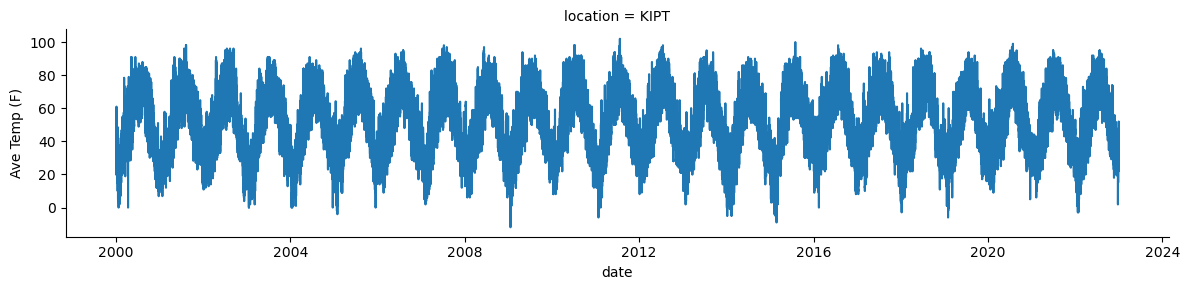

In [535]:
# ANSWER

df=df_ave_temps.melt(value_vars=["KIPT"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)

df = df.reset_index()
df = df.rename(columns={"index":"date"})

g = sns.FacetGrid(data=df,row="location",hue="location",aspect=4)
g.map(sns.lineplot,"date","Ave Temp (F)")
plt.show()

---
**20)**	[P] Compute a new Series that represents a running delta temperature between adjacent average temperature readings for KIPT. Then, plot the distribution of these data using whatever visualization you think characterizes this distribution best. (HINT: It's a series of observations over a single numeric variable. What type of plot can reveal the distribution of these data?)

<AxesSubplot: xlabel='KIPT', ylabel='Count'>

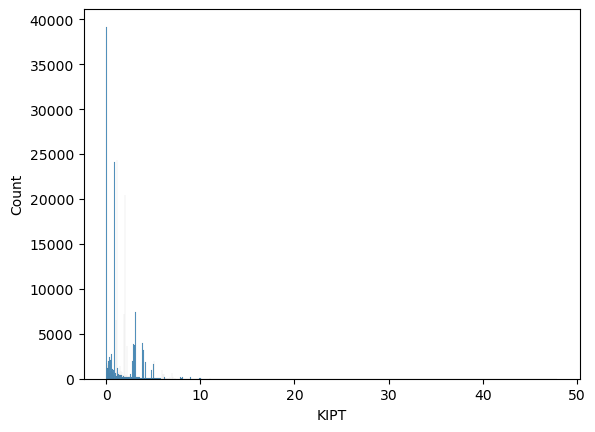

In [536]:
# ANSWER


delta_temp = np.abs(df_ave_temps.KIPT.diff())

sns.histplot(data=delta_temp)


---
**21)**	[P] When you see peculiarities, it's important to take a dive and look at some of the extreme cases. Use your delta data and show 20 dates listed in order of the largest absolute delta. You should be able to confirm that the largest delta readings are in 2000. Your result should looks something like this...

```
                               delta  abs_delta
2000-04-10 16:00:00+00:00  47.900002  47.900002
2000-04-10 20:00:00+00:00  35.700001  35.700001
2000-04-10 17:00:00+00:00 -30.630001  30.630001
2000-05-01 15:00:00+00:00  30.130001  30.130001
```

In [537]:
# ANSWER


delta_temp.sort_values(ascending=False)[:20]


2000-04-10 16:00:00+00:00    47.900002
2000-04-10 20:00:00+00:00    35.700001
2000-04-10 17:00:00+00:00    30.630001
2000-05-01 15:00:00+00:00    30.130001
2000-04-10 13:00:00+00:00    25.900002
2000-05-01 14:00:00+00:00    21.799999
2012-07-07 20:00:00+00:00    20.070000
2016-11-19 16:00:00+00:00    19.980000
2002-01-01 05:00:00+00:00    18.119999
2022-07-24 21:00:00+00:00    18.019997
2012-07-26 20:00:00+00:00    17.699997
2000-04-10 18:00:00+00:00    17.029999
2000-04-10 19:00:00+00:00    17.000000
2005-06-06 16:00:00+00:00    16.900002
2002-01-01 00:00:00+00:00    16.650002
2007-09-19 15:00:00+00:00    16.459999
2007-10-31 16:00:00+00:00    16.200001
2018-01-19 07:00:00+00:00    16.000000
2000-05-07 21:00:00+00:00    15.930000
2001-10-16 20:00:00+00:00    15.900002
Name: KIPT, dtype: float32

---
We already discovered some substantial problems with 2000. So, see if you can pick out a couple of other dates, and see if the delta values seem plausible. You may want to generate a plot near the value of interest to help you understand the delta, and consider if it's an error or a real value.

For example, consider the largest value from my example output above, July 7, 2012. Is that real??? Searching for historical weather data for Williamsport for July 7, 2012 led me to [this site on weatherspark](https://weatherspark.com/h/d/21192/2012/7/7/Historical-Weather-on-Saturday-July-7-2012-in-Williamsport-Pennsylvania-United-States#Figures-Temperature) You can see from that page that thunderstorms were rolling through the area in the afternoon and evening hours, and indeed the temperature really did drop. Kinda cool (ehh, no pun intended), but more importantly, it should also give you a warning to always be careful with the conclusions that you draw about your data. Sometimes, extreme values and outliers are indeed correct!

---


---
**22)** [P] Let's see which of our nearby stations have the most similar values. Write a function called `compare_station` that takes two `Series` objects of numeric data, and computes the sum of the absolute value of the difference between each pair of numbers in both `Series`. You should only sum the values that have valid values for both entries. Return the average of these absolute differences.

Then, call `compare_station` on KIPT and each of the other stations, but pass only the average temp vector from each station using your `df_ave_temps` DataFrame.



In [538]:
# ANSWER
def compare_station(series1: pd.Series, series2: pd.Series):
    ''' Compare two numeric Series objects. It is assumed that they are already aligned. Return 
        the mean of the absolute value of the difference between each value
    '''
    diff = np.abs(series1.subtract(series2))
    return diff.sum()



print("KIPT-KSEG: {}".format(compare_station(df_ave_temps.KIPT,df_ave_temps.KSEG)))
print("KIPT-KUNV: {}".format(compare_station(df_ave_temps.KIPT,df_ave_temps.KUNV)))
print("KIPT-KCXY: {}".format(compare_station(df_ave_temps.KIPT,df_ave_temps.KCXY)))






KIPT-KSEG: 401095.5
KIPT-KUNV: 570623.125
KIPT-KCXY: 587733.375


---
**23)**	[P] As we learned in class, you could compute a correlation coefficient between columns of data to determine similarity. Compute the correlation coefficient between the average temp of KIPT, and each of the other stations you downloaded. They should all be very close to 1, but not quite. Be sure you show at least 5-6 digits for precision (look up `pd.set_option`). What does this technique suggest which station is most similar?

In [539]:
# ANSWER
pd.set_option('display.precision', 6)


print("KSEG is most similar to KIPT")
df_ave_temps.corr().iloc[0]

KSEG is most similar to KIPT


KIPT    1.000000
KSEG    0.988366
KUNV    0.980131
KCXY    0.980835
Name: KIPT, dtype: float64

---
**24)**	[M] Interpret what you have observed so far. Which station is most similar? How would this affect your approach to cleaning your data? Are there other things you might do to clean your data?

**ANSWER:**
KSEG is the most similar to KIPT, so it would be best to use KSEG values to fill in missing or erroneous cells of KIPT. The next step in the data cleaning might be data norming between the different variables in df_kipt.




---
**25)**	 [P] Create a new attribute called `KIPT_GOOD` in your `df_ave_temps` data frame that keeps all of the original average temp data, but takes the readings from the closest station to replace in the NA values. Be sure to replace the data from the best representative first, then the second best. Ignore the third. When you perform data cleaning, NEVER DELETE YOUR ORIGINAL DATA! Either store it, or just create a separate attribute of cleaned data, or create a separate data frame. AND, be sure to print out what you are doing. Be sure to include a before and after view to indicate how many values you fixed.

For example, my code output the following:
```
Starting with 3435 missing values in KIPT
Copying 1625 values from KSEG
Next, copying 377 values from KUNV
We still have 1433 missing values in KIPT
```


In [540]:
# ANSWER

df_clean1 = df_ave_temps.KIPT.fillna(df_ave_temps.KSEG)
print("copied {} vals from KSEG".format(df_ave_temps.KIPT.isna().sum()-df_clean1.isna().sum()))
df_clean2 = df_clean1.fillna(df_ave_temps.KUNV)
print("copied {} vals from KUNV".format(df_clean1.isna().sum()-df_clean2.isna().sum()))
df_clean3= df_clean2.fillna(df_ave_temps.KCXY)
print("copied {} vals from KCXY".format(df_clean2.isna().sum()-df_clean3.isna().sum()))
df_ave_temps["KIPT_GOOD"] = df_clean3


df_ave_temps.corr().iloc[0]

copied 1625 vals from KSEG
copied 377 vals from KUNV
copied 20 vals from KCXY


KIPT         1.000000
KSEG         0.988366
KUNV         0.980131
KCXY         0.980835
KIPT_GOOD    1.000000
Name: KIPT, dtype: float64

---
**26)**	[P] We want to consider setting singleton missing observations, i.e. those missing values that are surrounded by two good observations, as candidates to fill in with the average of their surrounding values. Before we do that, report the number of missing values left in `KIPT_GOOD` that are singleton missing values.



In [555]:
# ANSWER


df_ave_temps.KIPT_GOOD[(df_ave_temps.KIPT_GOOD.isna()
                             & (df_ave_temps.KIPT_GOOD.shift().isna()==False)
                             & (df_ave_temps.KIPT_GOOD.shift(periods=-1).isna()==False))].shape[0]

172

---
**27)**	[P] Now, convert all singletons missing values in `KIPT_GOOD` to an average of the surrounding observations. For example […, 2, NaN, 5, …] would be filled in with $(2+5)/2 = 3.5$ for the NaN value. Then, report the number of values that are still missing in `KIPT_GOOD`.



In [565]:
# ANSWER

df_ave_temps.KIPT_GOOD.fillna((df_ave_temps.KIPT_GOOD.shift()+df_ave_temps.KIPT_GOOD.shift(periods=-1))/2,
                              inplace=True)


df_ave_temps.KIPT_GOOD.isna().sum()

1241

---
**28)**	[P] Eliminate that first year of data from `df_ave_temps`. There are too many missing values in these data to make it worthwhile.

In [566]:
# ANSWER


df_ave_temps[:"Dec 31 2000 at 11pm"]
df_ave_temps.drop(df_ave_temps[:"Dec 31 2000 at 11pm"].index,inplace=True)
df_ave_temps

,KIPT,KSEG,KUNV,KCXY,KIPT_GOOD
2001-01-01 00:00:00+00:00,21.000000,19.000000,15.800000,23.000000,21.000000
2001-01-01 01:00:00+00:00,19.900000,19.000000,14.000000,21.900000,19.900000
2001-01-01 02:00:00+00:00,19.000000,17.100000,15.800000,21.000000,19.000000
2001-01-01 03:00:00+00:00,19.000000,14.000000,15.800000,19.000000,19.000000
2001-01-01 04:00:00+00:00,19.000000,14.000000,15.800000,18.000000,19.000000
...,...,...,...,...,...
2022-12-31 19:00:00+00:00,46.950001,46.000000,42.799999,51.099998,46.950001
2022-12-31 20:00:00+00:00,45.470001,47.150002,42.799999,50.000000,45.470001
2022-12-31 21:00:00+00:00,46.450001,46.669998,NaN,NaN,46.450001
2022-12-31 22:00:00+00:00,46.000000,48.900002,NaN,48.000000,46.000000


---
**29)**	[P] Generate a final report of the total number of missing values in df_ave_temps.KIPT_GOOD by year by plotting the barchart showing the number of missing values by year.

Text(0.5, 0, 'missing vals in repaired KIPT')

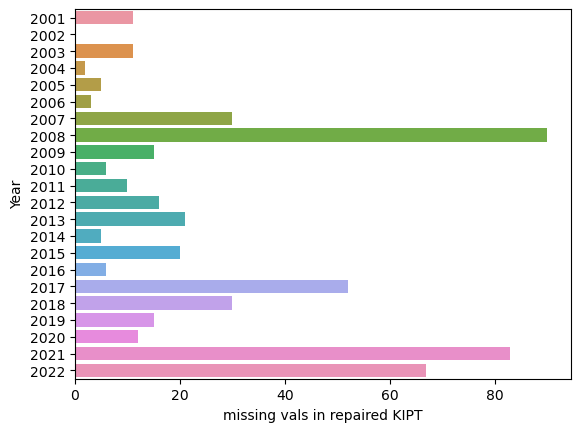

In [593]:
# ANSWER

fig, ax = plt.subplots()
missing = df_ave_temps.KIPT_GOOD.isna().resample('Y').sum()

sns.barplot(y=missing.index.year,x=missing,orient='h',ax=ax)
plt.ylabel("Year")
plt.xlabel("missing vals in repaired KIPT")





---
**30)**	[P] Finally, create three good, clean lineplots of `KIPT_GOOD`. More specifically, create three plots using different averaging times. One should be the raw data. Then, create one that shows the average temperature by month. Then, create one with average temperature by year.

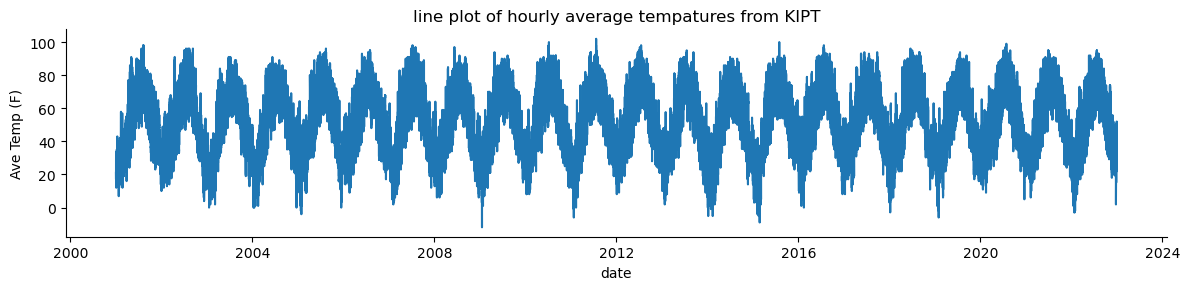

In [609]:
# ANSWER

df=df_ave_temps.melt(value_vars=["KIPT_GOOD"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)

df = df.reset_index()
df = df.rename(columns={"index":"date"})

g = sns.FacetGrid(data=df,row="location",hue="location",aspect=4)
g.map(sns.lineplot,"date","Ave Temp (F)")
plt.title('line plot of hourly average tempatures from KIPT')
plt.show()



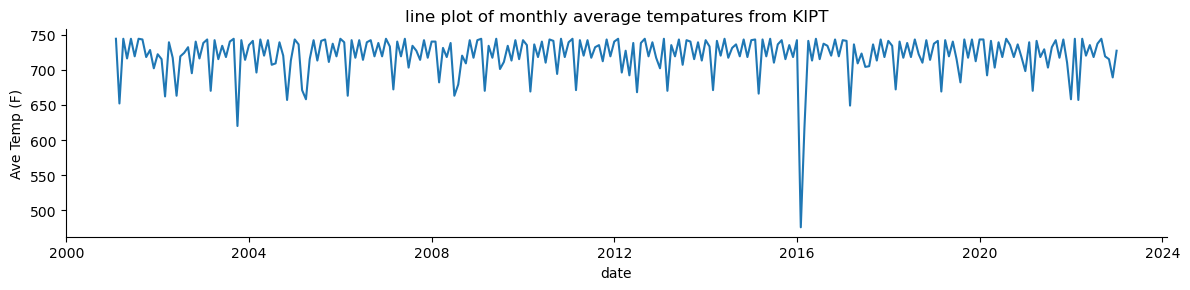

In [610]:
df=df_ave_temps.resample('M').count()
df =df.melt(value_vars=["KIPT"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)

df = df.reset_index()
df = df.rename(columns={"index":"date"})


g = sns.FacetGrid(data=df,row="location",hue="location",aspect=4)
g.map(sns.lineplot,"date","Ave Temp (F)")
plt.title('line plot of monthly average tempatures from KIPT')

plt.show()




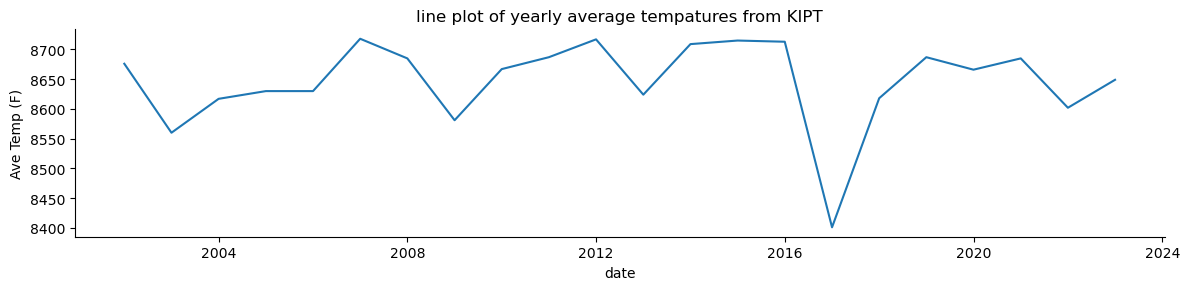

In [611]:

df=df_ave_temps.resample('Y').count()
df =df.melt(value_vars=["KIPT"],
           var_name="location",
           value_name="Ave Temp (F)",
           ignore_index=False)

df = df.reset_index()
df = df.rename(columns={"index":"date"})


g = sns.FacetGrid(data=df,row="location",hue="location",aspect=4)
g.map(sns.lineplot,"date","Ave Temp (F)")
plt.title('line plot of yearly average tempatures from KIPT')
plt.show()





